In [171]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def diff(f):
    x = sp.symbols('x')
    df = sp.diff(f(x), x)
    df = sp.lambdify(x, df)
    return df

f = lambda x: sp.cos(x)

X = np.linspace(0, 3.14, 4)
Y = np.array([f(x) for x in X])

df = diff(f)
dY = [df(x) for x in X]

X_interval = np.linspace(-2,5, 100)

**Polinômio Interpolador de Lagrange**

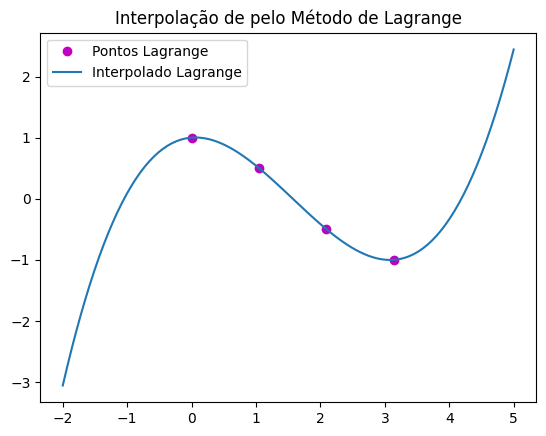

In [172]:
def lagrange(X,Y,x):
    n = len(X)
    p = 0.0
    for k in range(n):
        lk = 1.0
        for i in range(n):
            if k != i:
                lk = lk * (x - X[i]) / (X[k] - X[i])
        p = p + Y[k] * lk
    return p

Y_lagrange = [lagrange(X,Y,x) for x in X_interval]

plt.plot(X, Y, 'mo', label='Pontos Lagrange')
plt.plot(X_interval, Y_lagrange, '-', label='Interpolado Lagrange')
plt.title('Interpolação pelo Método de Lagrange')
plt.legend()
plt.show()


**Polinômio Interpolador de Neville**

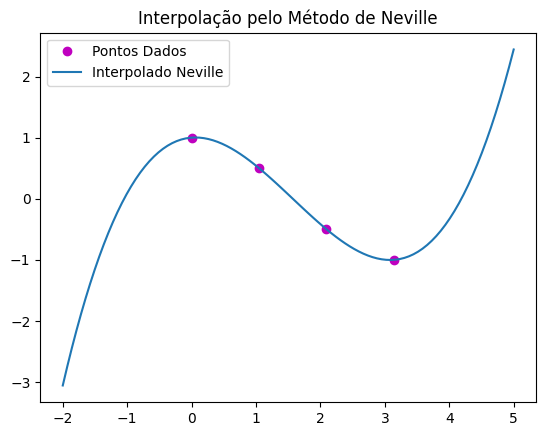

In [173]:
def neville(X, Y, x):
    n = len(X)
    Q = np.zeros((n, n))
    
    for i in range(n):
        Q[i][0] = Y[i]
    
    for i in range(1, n):
        for j in range(1, i + 1):
            Q[i][j] = ((x - X[i-j]) * Q[i][j-1] - (x - X[i]) * Q[i-1][j-1]) / (X[i] - X[i-j])
    return Q[n-1][n-1]

Y_neville = [neville(X, Y, x) for x in X_interval]

plt.plot(X, Y, 'mo', label='Pontos Dados')
plt.plot(X_interval, Y_neville, '-', label='Interpolado Neville')
plt.title('Interpolação pelo Método de Neville')
plt.legend()
plt.show()


**Polinômio Interpolador de Newton**

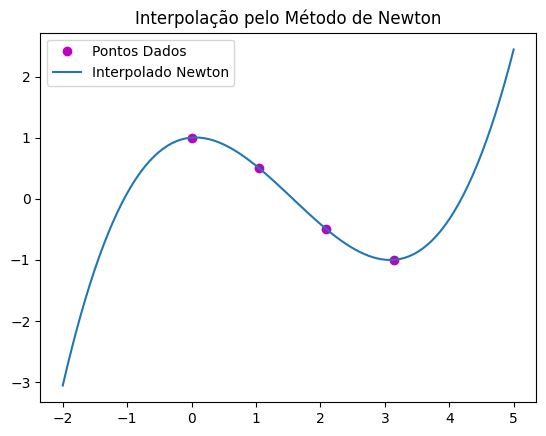

In [174]:
def dd(x, y, type = 'forward'):
    d = [y]
    n = len(x)
    for o in range(1, n):
        d.append([])
        for k in range(0, n - o):
            if type == 'forward':
                p = (d[o - 1][k + 1] - d[o - 1][k]) / (x[k + o] - x[k])
            elif type == 'backward':
                p = (d[o - 1][k] - d[o - 1][k + 1]) / (x[k] - x[k + o])
            elif type == 'central':
                p = (d[o - 1][k + 1] - d[o - 1][k]) / (x[k + o//2] - x[k + (o-1)//2])
            d[o].append(p)
    return d

def product(X, n, x):
    prod = 1
    for i in range(n):
        prod *= (x - X[i])
    return prod

def newton(X, dd, x):
    p = dd[0][0]
    for i in range(1, len(X)):
        p += product(X, i, x) * dd[i][0]
    return p

dd = dd(X,Y,'forward')

Y_newton = [newton(X, dd, x) for x in X_interval]

plt.plot(X, Y, 'mo', label='Pontos Dados')
plt.plot(X_interval, Y_newton, '-', label='Interpolado Newton')
plt.title('Interpolação pelo Método de Newton')
plt.legend()
plt.show()

**Polinômio Interpolador de Hermite**

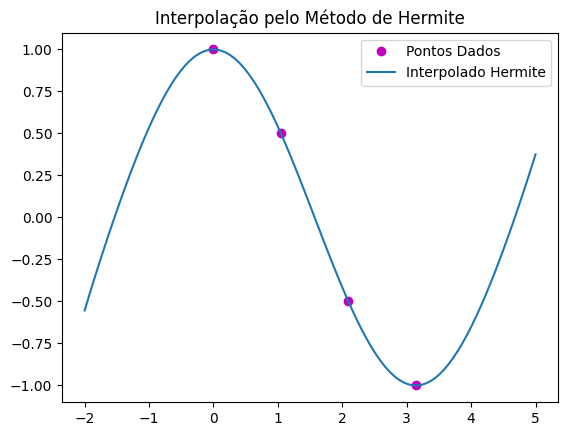

In [175]:
def hermite_dd(X, Y, dY):
    n = len(X)
    Z = np.zeros(2 * n)
    Q = np.zeros((2 * n, 2 * n))

    for i in range(n):
        Z[2 * i] = Z[2 * i + 1] = X[i]
        Q[2 * i][0] = Q[2 * i + 1][0] = Y[i]
        Q[2 * i + 1][1] = dY[i]
        if i != 0:
            Q[2 * i][1] = (Q[2 * i][0] - Q[2 * i - 1][0]) / (Z[2 * i] - Z[2 * i - 1])

    for i in range(2, 2 * n):
        for j in range(2, i + 1):
            Q[i][j] = (Q[i][j - 1] - Q[i - 1][j - 1]) / (Z[i] - Z[i - j])

    return Z, Q

def hermite(X, Y, dY, x):
    Z, Q = hermite_dd(X, Y, dY)
    n = len(X)

    p = Q[0][0]

    for i in range(1, 2 * n):
        p += Q[i][i] * product(Z, i, x)
    return p

Y_hermite = [hermite(X, Y, dY, x) for x in X_interval]

plt.plot(X, Y, 'mo', label='Pontos Dados')
plt.plot(X_interval, Y_hermite, '-', label='Interpolado Hermite')
plt.title('Interpolação pelo Método de Hermite')
plt.legend()
plt.show()


**Spline Cúbico Natural**

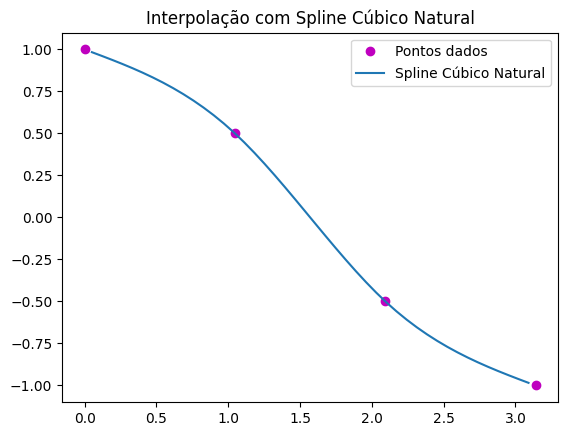

In [176]:
def spline(X, a, x):
    n = len(X)
    
    A = np.zeros((n, n))
    b = np.zeros(n)
    
    A[0, 0] = 1
    A[n - 1, n - 1] = 1
    
    h = [X[i + 1] - X[i] for i in range(n - 1)]

    for i in range(1, n - 1):
        A[i, i - 1] = h[i - 1]
        A[i, i] = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]

        b[i] = 3 * ((a[i + 1] - a[i]) / h[i] - (a[i] - a[i - 1]) / h[i - 1])
    
    c = np.linalg.solve(A, b)
    
    b = [(a[i + 1] - a[i]) / h[i] - h[i] * (2 * c[i] + c[i + 1]) / 3 for i in range(n - 1)]
    d = [(c[i + 1] - c[i]) / (3 * h[i]) for i in range(n - 1)]
    
    for i in range(n - 1):
        if X[i] <= x <= X[i + 1]:
            dx = x - X[i]
            return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3
    
y_spline = [spline(X, Y, x) for x in X_interval]

plt.plot(X, Y, 'mo', label='Pontos dados')
plt.plot(X_interval, y_spline, '-', label='Spline Cúbico Natural')
plt.title('Interpolação com Spline Cúbico Natural')
plt.legend()
plt.show()

**Spline Cúbico Fixado**

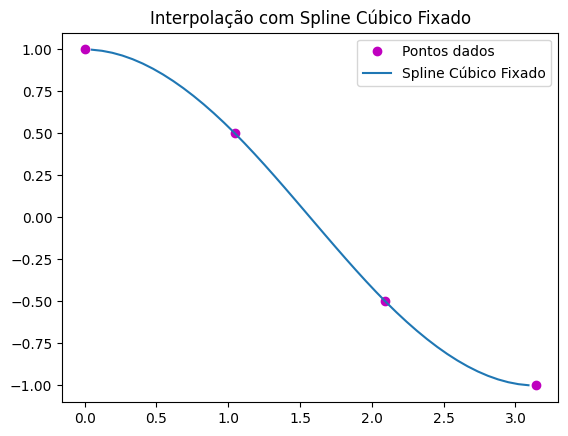

In [177]:
def fixed_spline(X, a, yp0, ypn, x):
    n = len(X) - 1

    A = np.zeros((n + 1, n + 1))
    b = np.zeros(n + 1)
    
    h = [X[i + 1] - X[i] for i in range(n)]

    A[0, 0] = 2 * h[0]
    A[0, 1] = h[0]
    
    A[n, n - 1] = h[-1]
    A[n, n] = 2 * h[-1]

    b[0] = 3 * ((a[1] - a[0]) / h[0] - yp0)
    b[n] = 3 * (ypn - (a[n] - a[n - 1]) / h[-1])

    for i in range(1, n):
        A[i, i - 1] = h[i - 1]
        A[i, i] = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]

        b[i] = 3 * ((a[i + 1] - a[i]) / h[i] - (a[i] - a[i - 1]) / h[i - 1])
    
    c = np.linalg.solve(A, b)
    
    b = [(a[i + 1] - a[i]) / h[i] - h[i] * (2 * c[i] + c[i + 1]) / 3 for i in range(n)]
    d = [(c[i + 1] - c[i]) / (3 * h[i]) for i in range(n)]
    
    for i in range(n):
        if X[i] <= x <= X[i + 1]:
            dx = x - X[i]
            return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3


dy0 = df(X[0])
dyn = df(X[-1])

y_fspline = [fixed_spline(X, Y, dy0, dyn, x) for x in X_interval]

plt.plot(X, Y, 'mo', label='Pontos dados')
plt.plot(X_interval, y_fspline, '-', label='Spline Cúbico Fixado')
plt.title('Interpolação com Spline Cúbico Fixado')
plt.legend()
plt.show()


**Curvas de Bezier**

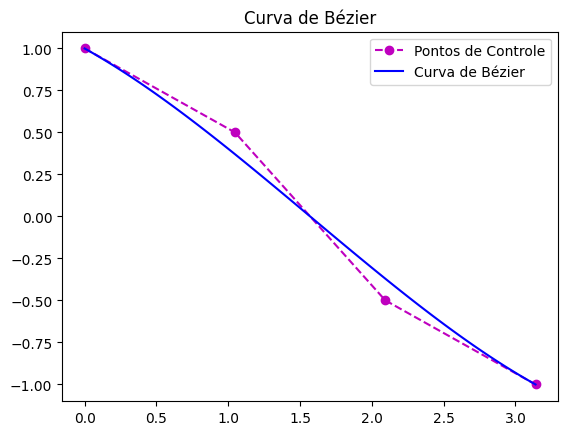

In [178]:
def bezier_curve(X, Y, n_points=100):
    X = np.array(X, dtype=float)
    Y = np.array(Y, dtype=float)
    
    n = len(X) - 1
    t = np.linspace(0, 1, n_points)
    curve = np.zeros((n_points, 2))
    
    for i in range(n + 1):
        binomial_coefficient = math.comb(n, i)
        term = binomial_coefficient * (t ** i) * ((1 - t) ** (n - i))
        curve[:, 0] += term * X[i]
        curve[:, 1] += term * Y[i]
    return curve

curve = bezier_curve(X, Y)

plt.plot(X, Y, 'mo--', label='Pontos de Controle')
plt.plot(curve[:, 0], curve[:, 1], 'b-', label='Curva de Bézier')
plt.title('Curva de Bézier')
plt.legend()
plt.show()